In [1]:
import quantstats as qs
import pandas as pd
import yfinance as yf
import statsmodels.api as sm
import getFamaFrenchFactors as gff
import datetime as dt

import numpy as np 
# Used to grab the stock prices, with yahoo 
import pandas_datareader as web 
#from datetime import datetime 
# To visualize the results 
import matplotlib.pyplot as plt 
import seaborn
import quantstats as qs

#Importing all required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
from matplotlib.ticker import FuncFormatter


In [20]:
positions = pd.read_excel("final_positions.xlsx")
positions

,Symbols,Quantity,Cost,total cost
0,ADBE,13,319.27,4150.51
1,BA,12,141.99,1703.88
2,BSL,1343,12.42,16680.06
3,C6L.SI,2800,5.13,14364.00
4,CSCO,154,43.48,6695.92
5,D05.SI,300,32.75,9825.00
6,JPM,35,121.85,4264.75
7,MA,13,308.56,4011.28
8,NEE,182,75.67,13771.94
9,NVDA,19,128.70,2445.30


In [25]:
web.DataReader('D05.SI', start=date, end = date, data_source='yahoo')['Adj Close']

Date
2022-10-28    33.779999
Name: Adj Close, dtype: float64

In [28]:
tickers=positions['Symbols']

thelen = len(tickers)
price_data = []
date = '2022-10-28'
for ticker in range(thelen):
    prices = web.DataReader(tickers[ticker], start=date, end = date, data_source='yahoo')
    #print(prices)
    price_data.append(prices['Adj Close'])
df_stocks = pd.concat(price_data, axis=1)
df_stocks.columns=tickers
df_stocks.head()

#Checking if any NaN values in the data
nullin_df = pd.DataFrame(df_stocks,columns=tickers)
print(nullin_df.isnull().sum())

df_stocks

Symbols
ADBE      0
BA        0
BSL       0
C6L.SI    1
CSCO      0
D05.SI    1
JPM       0
MA        0
NEE       0
NVDA      0
SBUX      0
TCEHY     0
VBR       0
YUMC      0
dtype: int64


Symbols,ADBE,BA,BSL,C6L.SI,CSCO,D05.SI,JPM,MA,NEE,NVDA,SBUX,TCEHY,VBR,YUMC
Date,,,,,,,,,,,,,,
2022-10-27,318.649994,139.759995,12.35,NaN,44.419998,NaN,124.599998,319.369995,75.470001,131.759995,85.279999,26.959999,157.770004,41.41
2022-10-28,325.679993,143.839996,12.65,5.14,45.639999,33.779999,126.080002,329.470001,79.029999,138.339996,87.099998,25.830000,160.509995,41.48


In [31]:
df_stocks.drop('2022-10-27',inplace=True)
df_stocks

Symbols,ADBE,BA,BSL,C6L.SI,CSCO,D05.SI,JPM,MA,NEE,NVDA,SBUX,TCEHY,VBR,YUMC
Date,,,,,,,,,,,,,,
2022-10-28,325.679993,143.839996,12.65,5.14,45.639999,33.779999,126.080002,329.470001,79.029999,138.339996,87.099998,25.83,160.509995,41.48


In [34]:
positions['CurrentPrice']=df_stocks.iloc[0].to_list()
positions['TotalCurrentPrice']=positions['CurrentPrice']*positions['Quantity']
positions['Profit'] = positions['TotalCurrentPrice'] - positions['total cost']
positions['Profit_percentage(in %)'] = positions['Profit']/positions['total cost']*100

positions

,Symbols,Quantity,Cost,total cost,CurrentPrice,TotalCurrentPrice,Profit,Profit_percentage,Profit_percentage(in %)
0,ADBE,13,319.27,4150.51,325.679993,4233.839905,83.329905,0.020077,2.007703
1,BA,12,141.99,1703.88,143.839996,1726.079956,22.199956,0.013029,1.302906
2,BSL,1343,12.42,16680.06,12.650000,16988.949488,308.889488,0.018518,1.851849
3,C6L.SI,2800,5.13,14364.00,5.140000,14391.999626,27.999626,0.001949,0.194929
4,CSCO,154,43.48,6695.92,45.639999,7028.559906,332.639906,0.049678,4.967800
5,D05.SI,300,32.75,9825.00,33.779999,10133.999634,308.999634,0.031450,3.145034
6,JPM,35,121.85,4264.75,126.080002,4412.800064,148.050064,0.034715,3.471483
7,MA,13,308.56,4011.28,329.470001,4283.110016,271.830016,0.067766,6.776640
8,NEE,182,75.67,13771.94,79.029999,14383.459778,611.519778,0.044403,4.440331
9,NVDA,19,128.70,2445.30,138.339996,2628.459930,183.159930,0.074903,7.490285


In [45]:
total_profit = sum(positions['Profit'])
total_invested= sum(positions['total cost'])
print(f'Total Money Invested : {total_invested}')
print(f'Total Profit earned : {total_profit}')
print(f'Total Profit Percentage earned : {total_profit*100/total_invested}%')

Total Money Invested : 98029.42
Total Profit earned : 2905.7478886413555
Total Profit Percentage earned : 2.9641590133261584%


<AxesSubplot:xlabel='Symbols'>

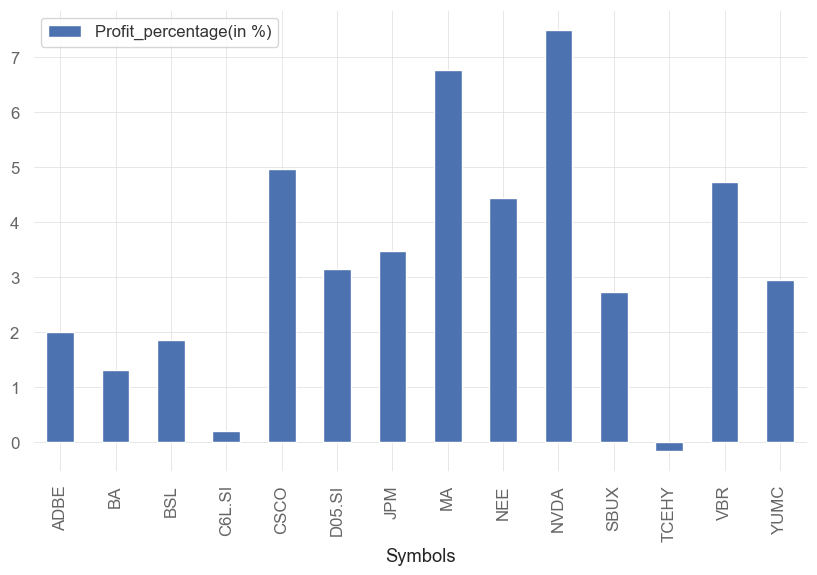

In [61]:
positions.plot(x=0,y="Profit_percentage(in %)",kind='bar')

In [75]:
import yfinance as yf

msft = yf.Ticker("VBR")

company_name = msft.info['longName']
company_name
msft.info

{'exchange': 'PCX',
 'shortName': 'Vanguard Small-Cap Value ETF',
 'longName': 'Vanguard Small Cap Value Index Fund',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'isEsgPopulated': False,
 'gmtOffSetMilliseconds': '-14400000',
 'quoteType': 'ETF',
 'symbol': 'VBR',
 'messageBoardId': 'finmb_22939653',
 'market': 'us_market',
 'annualHoldingsTurnover': None,
 'enterpriseToRevenue': None,
 'beta3Year': 1.13,
 'profitMargins': None,
 'enterpriseToEbitda': None,
 '52WeekChange': None,
 'morningStarRiskRating': None,
 'forwardEps': None,
 'revenueQuarterlyGrowth': None,
 'fundInceptionDate': 1075075200,
 'annualReportExpenseRatio': None,
 'totalAssets': 40691904512,
 'bookValue': None,
 'fundFamily': 'Vanguard',
 'lastFiscalYearEnd': None,
 'netIncomeToCommon': None,
 'trailingEps': None,
 'lastDividendValue': None,
 'SandP52WeekChange': None,
 'priceToBook': None,
 'nextFiscalYearEnd': None,
 'yield': 0.023,
 'mostRecentQuarter': None,
 'enterpriseValu

In [78]:
def get_info(tickers):
    sectors=[]
    country=[]
    name=[]
    industry = []
    for i in tickers:
        ticker = yf.Ticker(i)
        print(i)
        if(ticker.info['quoteType'] == 'ETF'):
            sectors.append(ticker.info['quoteType'])
            name.append(ticker.info['longName'])
            country.append(None)
            industry.append(ticker.info['quoteType'])
        else:
            sectors.append(ticker.info['sector'])
            name.append(ticker.info['longName'])
            country.append(ticker.info['country'])
            industry.append(ticker.info['industry'])


    return [sectors,name,country,industry]

In [79]:
info=get_info(list(tickers))


ADBE
BA
BSL
C6L.SI
CSCO
D05.SI
JPM
MA
NEE
NVDA
SBUX
TCEHY
VBR
YUMC


In [113]:
data=pd.DataFrame(d,index=list(tickers))
d={}
columns=["sectors","name","country","industry"]
for i in range(len(info)):
    d[columns[i]]=info[i]

positions =positions.merge(data,left_on='Symbols',right_index=True)

In [115]:
positions.set_index('Symbols',inplace=True)

,Quantity,Cost,total cost,CurrentPrice,TotalCurrentPrice,Profit,Profit_percentage,Profit_percentage(in %),sectors,name,country,industry
Symbols,,,,,,,,,,,,
ADBE,13,319.27,4150.51,325.679993,4233.839905,83.329905,0.020077,2.007703,Technology,Adobe Inc.,United States,Software—Infrastructure
BA,12,141.99,1703.88,143.839996,1726.079956,22.199956,0.013029,1.302906,Industrials,The Boeing Company,United States,Aerospace & Defense
BSL,1343,12.42,16680.06,12.650000,16988.949488,308.889488,0.018518,1.851849,Financial Services,Blackstone / GSO Senior Floating Rate Term Fund,United States,Asset Management
C6L.SI,2800,5.13,14364.00,5.140000,14391.999626,27.999626,0.001949,0.194929,Industrials,Singapore Airlines Limited,Singapore,Airlines
CSCO,154,43.48,6695.92,45.639999,7028.559906,332.639906,0.049678,4.967800,Technology,"Cisco Systems, Inc.",United States,Communication Equipment
D05.SI,300,32.75,9825.00,33.779999,10133.999634,308.999634,0.031450,3.145034,Financial Services,DBS Group Holdings Ltd,Singapore,Banks—Regional
JPM,35,121.85,4264.75,126.080002,4412.800064,148.050064,0.034715,3.471483,Financial Services,JPMorgan Chase & Co.,United States,Banks—Diversified
MA,13,308.56,4011.28,329.470001,4283.110016,271.830016,0.067766,6.776640,Financial Services,Mastercard Incorporated,United States,Credit Services
NEE,182,75.67,13771.94,79.029999,14383.459778,611.519778,0.044403,4.440331,Utilities,"NextEra Energy, Inc.",United States,Utilities—Regulated Electric


In [116]:
positions.to_excel('positions.xlsx')

In [127]:
positions.groupby(by='sectors').sum()

,Quantity,Cost,total cost,CurrentPrice,TotalCurrentPrice,Profit,Profit_percentage,Profit_percentage(in %)
sectors,,,,,,,,
Communication Services,113,25.87,2923.31,25.830000,2918.789991,-4.520009,-0.001546,-0.154620
Consumer Cyclical,171,125.08,10449.59,128.579998,10742.679836,293.089836,0.056780,5.677961
ETF,44,153.27,6743.88,160.509995,7062.439758,318.559758,0.047237,4.723687
Financial Services,1691,475.58,34781.09,501.980001,35818.859201,1037.769201,0.152450,15.245006
Industrials,2812,147.12,16067.88,148.979996,16118.079582,50.199582,0.014978,1.497835
Technology,186,491.45,13291.73,509.659988,13890.859741,599.129741,0.144658,14.465787
Utilities,182,75.67,13771.94,79.029999,14383.459778,611.519778,0.044403,4.440331


<AxesSubplot:>

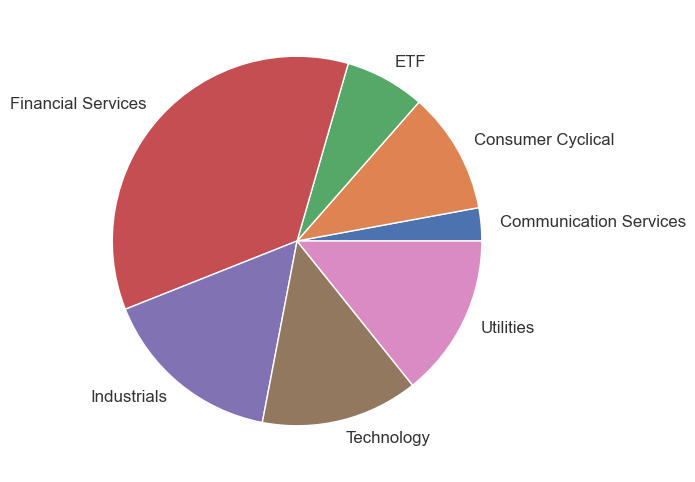

In [137]:
positions.groupby(by='sectors').sum().plot.pie(y='TotalCurrentPrice',ylabel='',legend=False)

<AxesSubplot:>

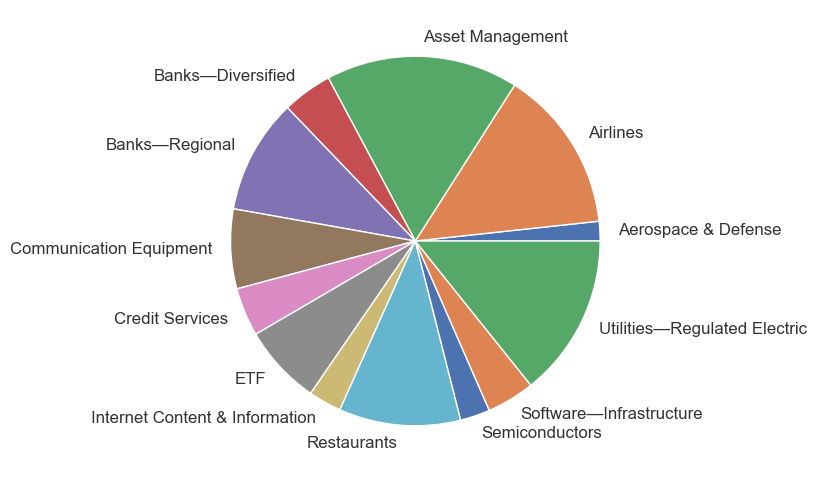

In [134]:
positions.groupby(by='industry').sum().plot.pie(y='TotalCurrentPrice',legend=False,ylabel='')


<AxesSubplot:>

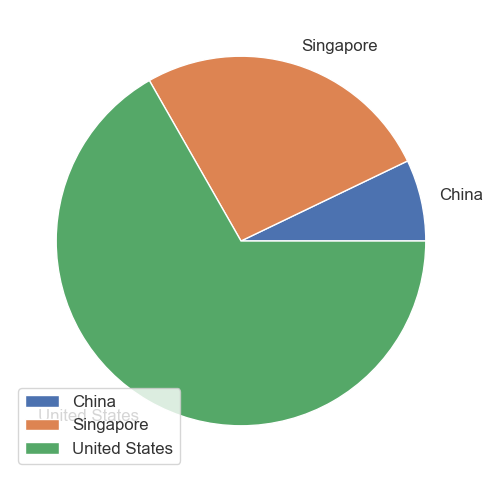

In [135]:
positions.groupby(by='country').sum().plot.pie(y='TotalCurrentPrice',ylabel='')